# Enerji İstatistik Notları 70 - 2024'de Türkiye'de Enerji

Barış Sanlı - barissanli2@gmail.com


In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df = pd.read_csv('narrow2025.csv')

In [3]:
df_orig=df.copy()

In [4]:
tr=df[df.Country=="Turkiye"].pivot(index="Year", columns="Var", values="Value")

In [5]:
tr.columns

Index(['biofuels_cons_ej', 'biofuels_cons_kbd', 'biogeo_ej', 'biogeo_twh',
       'biogeo_twh_net', 'co2_combust_mtco2', 'co2_combust_pc',
       'co2_combust_per_ej', 'co2_mtco2', 'coalcons_ej', 'coalprod_ej',
       'coalprod_mt', 'elect_twh', 'electbyfuel_coal', 'electbyfuel_gas',
       'electbyfuel_hydro', 'electbyfuel_nuclear', 'electbyfuel_oil',
       'electbyfuel_other', 'electbyfuel_ren_power', 'electbyfuel_total',
       'gascons_bcfd', 'gascons_bcm', 'gascons_ej', 'graphite_kt',
       'graphiteres_kt', 'hydro_ej', 'hydro_twh', 'hydro_twh_net',
       'liqcons_kbd', 'methane_process_mtco2', 'nuclear_ej', 'nuclear_twh',
       'nuclear_twh_net', 'oilcons_ej', 'oilcons_kbd', 'oilcons_mt', 'pop',
       'refcap_kbd', 'refcaputil_pct', 'refthru_kbd', 'ren_power_ej',
       'ren_power_twh', 'ren_power_twh_net', 'renewables_ej', 'solar_ej',
       'solar_twh', 'solar_twh_net', 'tes_ej', 'tes_gj_pc', 'wind_ej',
       'wind_twh', 'wind_twh_net'],
      dtype='object', name='Var')

In [6]:
tr["oil_rate"]=tr.oilcons_ej/tr.tes_ej
tr["gas_rate"]=tr.gascons_ej/tr.tes_ej
tr["coal_rate"]=tr.coalcons_ej/tr.tes_ej
tr["ren_rate"]=tr.renewables_ej/tr.tes_ej
tr["renpow_rate"]=tr.ren_power_ej/tr.tes_ej
tr["elec_rate"]=(tr.elect_twh/277.7)/tr.tes_ej


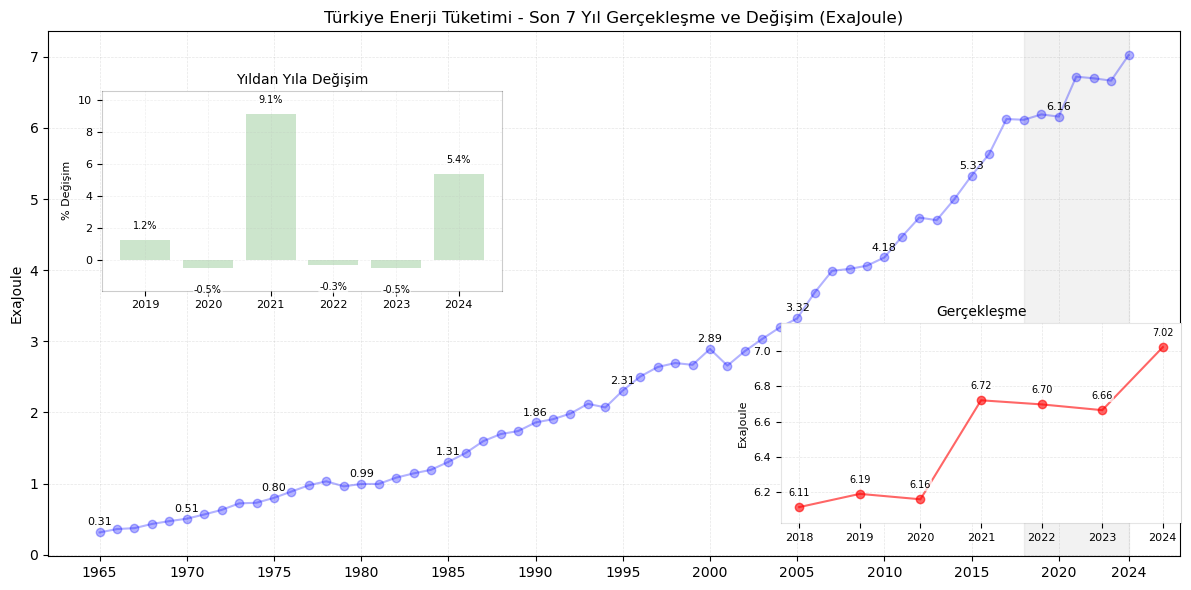

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.ticker as ticker
import numpy as np

def plot_trend_with_inset(
    df, 
    column, 
    recent_years_count=5, 
    annotate=0, 
    title="Turkey Energy Consumption: Long-Term Trend and Recent Changes", 
    ylabel="Consumption (EJ)", 
    figsize=(12, 6), 
    inset_width=4.0, 
    inset_height=2.0, 
    bbox_to_anchor_trend=(1.01, 0.55), 
    bbox_to_anchor_pct=(1.01, 0.25), 
    borderpad=4,
    vspan_edgecolor='black',
    inset_border_alpha=0.2  # New parameter for inset border alpha
):
    """
    Plot a time series from a DataFrame with two insets: one for recent years (line plot) 
    and one for year-over-year percentage change (bar plot) with annotations.
    
    Parameters:
    - df: DataFrame with 'year' index and column to plot
    - column: Name of the column to plot (e.g., 'oilcons_ej')
    - recent_years_count: Number of recent years to highlight in insets (default: 5)
    - annotate: Annotate main plot years divisible by this number (e.g., 5 for multiples of 5, 0 for none) (default: 0)
    - title: Plot title (default: generic title)
    - ylabel: Y-axis label for main and trend inset plots (default: 'Consumption (EJ)')
    - figsize: Figure size as (width, height) (default: (12, 6))
    - inset_width: Inset width in inches for both insets (default: 4.0)
    - inset_height: Inset height in inches for both insets (default: 2.0)
    - bbox_to_anchor_trend: Inset position for trend plot (default: (1.01, 0.55))
    - bbox_to_anchor_pct: Inset position for percentage change plot (default: (1.01, 0.25))
    - borderpad: Padding around insets in points (default: 4)
    - vspan_edgecolor: Color of the grid area (axvspan) border (default: 'black')
    - inset_border_alpha: Alpha value for inset borders (default: 0.2)
    """
    # Validate column
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in DataFrame")

    # Create the main figure with constrained_layout
    fig = plt.figure(figsize=figsize, constrained_layout=True)
    ax = fig.add_subplot(111)

    # Plot the full time series (long-term trend)
    ax.plot(df.index, df[column], marker='o', linestyle='-', color='b', label=column, alpha=0.3)
    #ax.set_xlabel('Year')
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    # Faint grid for main plot
    ax.grid(True, alpha=0.2, linestyle='--', linewidth=0.5, color='gray')

    # Format main plot x-axis to show integer years
    # If annotate is specified, set ticks to match annotation intervals plus the last year
    if annotate > 0:
        # Create tick positions based on annotation interval
        start_year = df.index.min()
        end_year = df.index.max()
        
        # Find the first year that's divisible by annotate
        first_tick = start_year + (annotate - start_year % annotate) % annotate
        
        # Create ticks at annotation intervals
        tick_positions = list(range(first_tick, end_year, annotate))
        
        # Always include the last year if it's not already in the list
        if end_year not in tick_positions:
            tick_positions.append(end_year)
            
        # Set custom tick positions
        ax.set_xticks(tick_positions)
        ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
    else:
        ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    # Annotate main plot if annotate > 0
    if annotate > 0:
        for year, value in zip(df.index, df[column]):
            if year % annotate == 0:  # Annotate if year is multiple of annotate
                ax.annotate(
                    f'{value:.2f}', 
                    (year, value), 
                    xytext=(0, 5), 
                    textcoords='offset points', 
                    ha='center', 
                    fontsize=8
                )

    # Define recent years to highlight
    recent_years = df.index[-recent_years_count:]
    recent_data = df.loc[recent_years, column]

    # Create inset plot for recent years (trend)
    ax_inset = inset_axes(
        ax,
        width=inset_width,
        height=inset_height,
        loc='upper right',
        bbox_to_anchor=bbox_to_anchor_trend,
        bbox_transform=ax.transAxes,
        borderpad=borderpad
    )

    # Plot recent years in the inset
    ax_inset.plot(recent_years, recent_data, marker='o', linestyle='-', color='r', alpha=0.6)
    ax_inset.grid(True, alpha=0.2, linestyle='--', linewidth=0.5, color='gray')

    ax_inset.set_title('Gerçekleşme', fontsize=10, pad=5)  # Increased padding
    ax_inset.tick_params(axis='both', labelsize=8)

    # Format inset x-axis to show all years
    ax_inset.set_xticks(recent_years)
    ax_inset.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
    ax_inset.set_ylabel(ylabel, fontsize=8)

                         
    # Rotate x-axis labels if there are many years to prevent overlap
    if len(recent_years) > 5:
        ax_inset.tick_params(axis='x', rotation=0)

    # Set faint border for trend inset
    for spine in ax_inset.spines.values():
        spine.set_edgecolor('gray')
        spine.set_alpha(inset_border_alpha)

    # Annotate all years in the trend inset plot with better positioning
    y_range = recent_data.max() - recent_data.min()
    annotation_offset = y_range * 0.05  # Dynamic offset based on data range
    
    for year, value in zip(recent_years, recent_data):
        ax_inset.annotate(
            f'{value:.2f}', 
            (year, value), 
            xytext=(0, 8), 
            textcoords='offset points', 
            ha='center', 
            fontsize=7,  # Slightly smaller font
            bbox=dict(boxstyle="round,pad=0.1", facecolor='white', alpha=0.7, edgecolor='none')
        )

    # Adjust y-axis limits to accommodate annotations
    y_min, y_max = ax_inset.get_ylim()
    ax_inset.set_ylim(y_min - annotation_offset, y_max + annotation_offset * 2)

    # Calculate year-over-year percentage change for recent years
    pct_change = df.loc[recent_years, column].pct_change() * 100
    # Drop the first NaN value (since pct_change produces NaN for the first year)
    pct_years = recent_years[1:]
    pct_values = pct_change.iloc[1:]

    # Create inset plot for percentage change (bar plot)
    ax_inset2 = inset_axes(
        ax,
        width=inset_width,
        height=inset_height,
        loc='lower right',
        bbox_to_anchor=bbox_to_anchor_pct,
        bbox_transform=ax.transAxes,
        borderpad=borderpad
    )

    # Plot percentage change as a bar plot
    bars = ax_inset2.bar(pct_years, pct_values, color='green', alpha=0.2)
    ax_inset2.grid(True, alpha=0.2, linestyle='--', linewidth=0.5)
    ax_inset2.set_title('Yıldan Yıla Değişim', fontsize=10, pad=5)  # Increased padding
    ax_inset2.set_ylabel('% Değişim', fontsize=8)
    ax_inset2.tick_params(axis='both', labelsize=8)

    # Format inset2 x-axis to show all years
    ax_inset2.set_xticks(pct_years)
    ax_inset2.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
    
    # Rotate x-axis labels if there are many years to prevent overlap
    if len(pct_years) > 5:
        ax_inset2.tick_params(axis='x', rotation=0)

    # Set faint border for percentage change inset
    for spine in ax_inset2.spines.values():
        spine.set_edgecolor('black')
        spine.set_alpha(inset_border_alpha)

    # Annotate each bar with percentage change value with better positioning
    pct_range = abs(pct_values.max() - pct_values.min()) if len(pct_values) > 0 else 1
    annotation_offset_pct = pct_range * 0.05  # Dynamic offset based on data range
    
    for bar, value in zip(bars, pct_values):
        if not np.isnan(value):  # Skip NaN values
            # Determine annotation position based on bar height
            if value >= 0:
                xytext = (0, 8)
            else:
                xytext = (0, -18)
            
            ax_inset2.annotate(
                f'{value:.1f}%', 
                (bar.get_x() + bar.get_width() / 2, value), 
                xytext=xytext,
                textcoords='offset points', 
                ha='center', 
                fontsize=7,  # Slightly smaller font
                bbox=dict(boxstyle="round,pad=0.1", facecolor='white', alpha=0.7, edgecolor='none')
            )

    # Adjust y-axis limits to accommodate annotations
    y_min, y_max = ax_inset2.get_ylim()
    ax_inset2.set_ylim(y_min - annotation_offset_pct * 2, y_max + annotation_offset_pct * 2)

    # Highlight recent years area on the main plot with custom border color
    ax.axvspan(
        recent_years[0], 
        recent_years[-1], 
        color='gray', 
        alpha=0.1, 
        edgecolor=vspan_edgecolor, 
        linewidth=1.0
    )

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()


# Test the function
plot_trend_with_inset(tr.copy(), 'tes_ej', recent_years_count=7, annotate=5, ylabel='ExaJoule',
                       bbox_to_anchor_trend=(1.05, 0.55), bbox_to_anchor_pct=(0.45, 0.40), title="Türkiye Enerji Tüketimi - Son 7 Yıl Gerçekleşme ve Değişim (ExaJoule)")

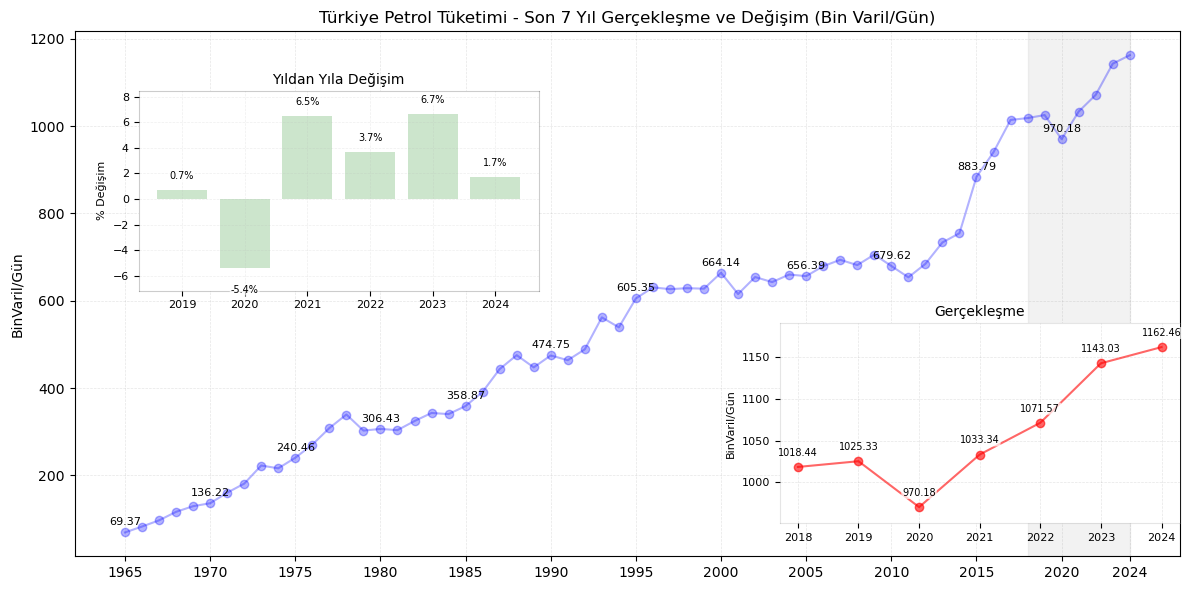

In [8]:
plot_trend_with_inset(tr.copy(), 'oilcons_kbd', recent_years_count=7, annotate=5, ylabel='BinVaril/Gün',
                       bbox_to_anchor_trend=(1.05, 0.55), bbox_to_anchor_pct=(0.47, 0.40), 
                       title="Türkiye Petrol Tüketimi - Son 7 Yıl Gerçekleşme ve Değişim (Bin Varil/Gün)")

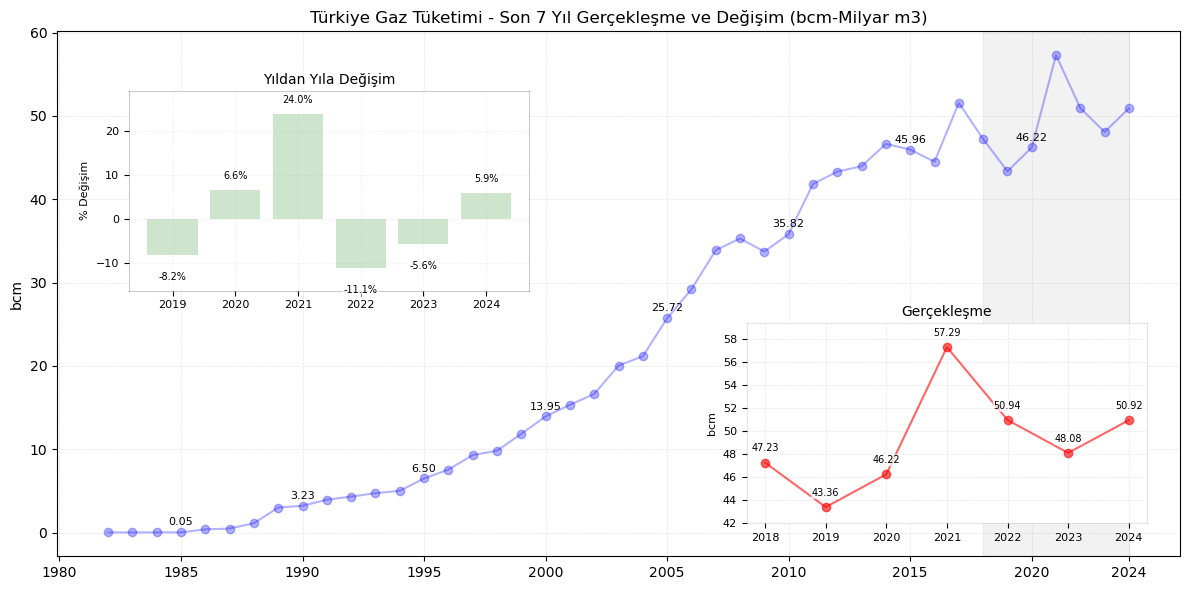

In [9]:
plot_trend_with_inset(tr.copy(), 'gascons_bcm', recent_years_count=7, annotate=5, ylabel='bcm',
                       bbox_to_anchor_trend=(1.02, 0.55), bbox_to_anchor_pct=(0.47, 0.40), 
                       title="Türkiye Gaz Tüketimi - Son 7 Yıl Gerçekleşme ve Değişim (bcm-Milyar m3)")

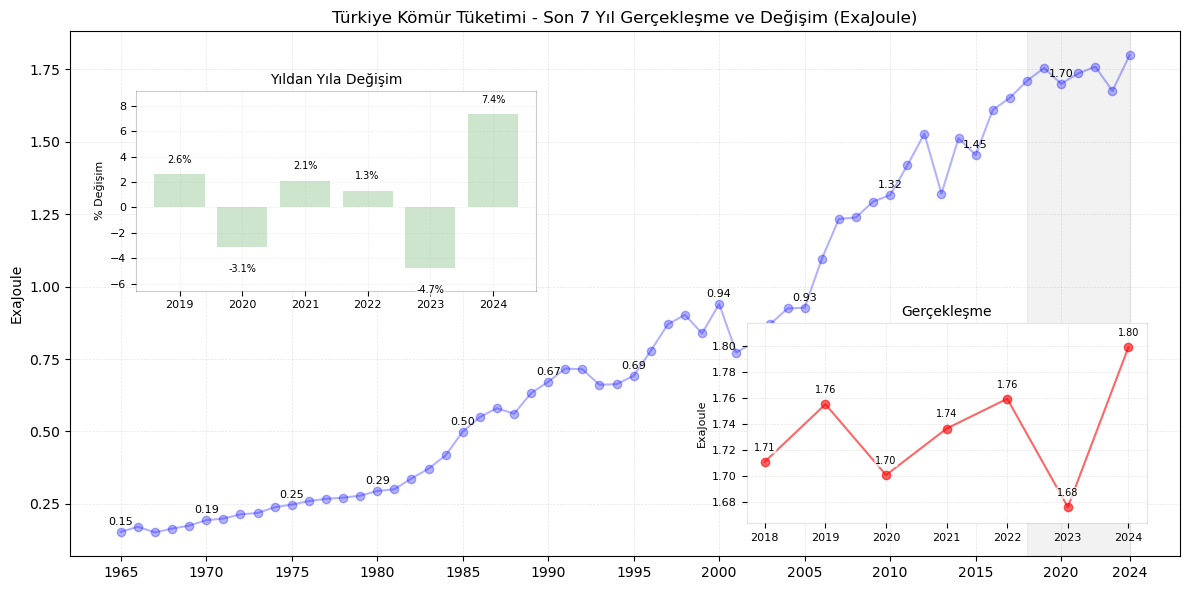

In [10]:
plot_trend_with_inset(tr.copy(), 'coalcons_ej', recent_years_count=7, annotate=5, ylabel='ExaJoule',
                       bbox_to_anchor_trend=(1.02, 0.55), bbox_to_anchor_pct=(0.47, 0.40), 
                       title="Türkiye Kömür Tüketimi - Son 7 Yıl Gerçekleşme ve Değişim (ExaJoule)")

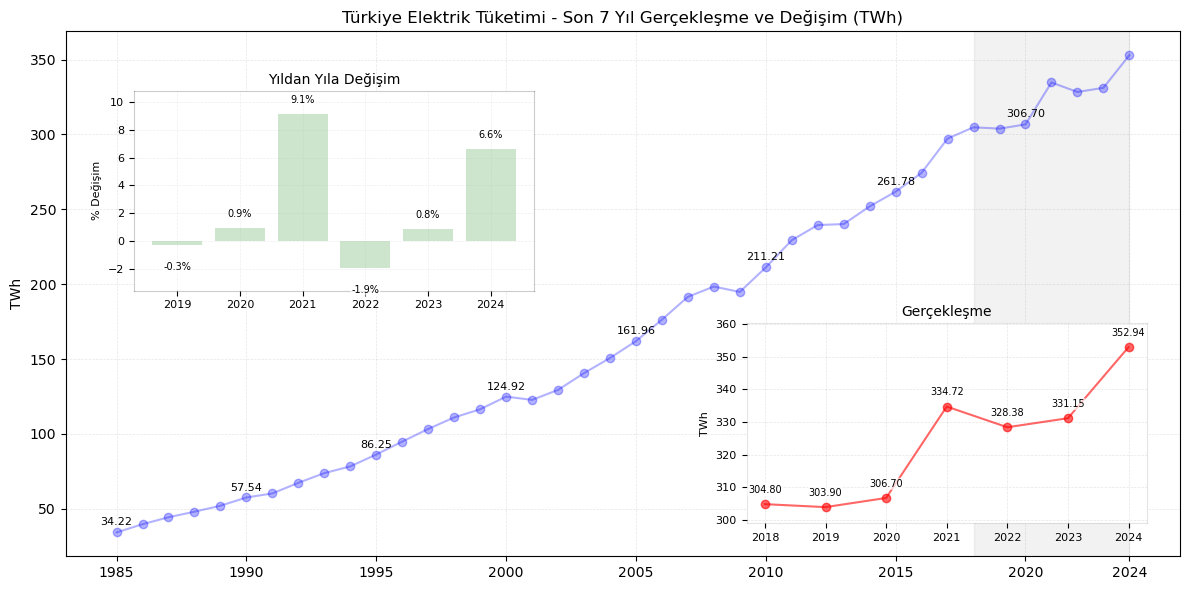

In [11]:
plot_trend_with_inset(tr.copy(), 'elect_twh', recent_years_count=7, annotate=5, ylabel='TWh',
                       bbox_to_anchor_trend=(1.02, 0.55), bbox_to_anchor_pct=(0.47, 0.40), 
                       title="Türkiye Elektrik Tüketimi - Son 7 Yıl Gerçekleşme ve Değişim (TWh)")

In [12]:
tr.columns

Index(['biofuels_cons_ej', 'biofuels_cons_kbd', 'biogeo_ej', 'biogeo_twh',
       'biogeo_twh_net', 'co2_combust_mtco2', 'co2_combust_pc',
       'co2_combust_per_ej', 'co2_mtco2', 'coalcons_ej', 'coalprod_ej',
       'coalprod_mt', 'elect_twh', 'electbyfuel_coal', 'electbyfuel_gas',
       'electbyfuel_hydro', 'electbyfuel_nuclear', 'electbyfuel_oil',
       'electbyfuel_other', 'electbyfuel_ren_power', 'electbyfuel_total',
       'gascons_bcfd', 'gascons_bcm', 'gascons_ej', 'graphite_kt',
       'graphiteres_kt', 'hydro_ej', 'hydro_twh', 'hydro_twh_net',
       'liqcons_kbd', 'methane_process_mtco2', 'nuclear_ej', 'nuclear_twh',
       'nuclear_twh_net', 'oilcons_ej', 'oilcons_kbd', 'oilcons_mt', 'pop',
       'refcap_kbd', 'refcaputil_pct', 'refthru_kbd', 'ren_power_ej',
       'ren_power_twh', 'ren_power_twh_net', 'renewables_ej', 'solar_ej',
       'solar_twh', 'solar_twh_net', 'tes_ej', 'tes_gj_pc', 'wind_ej',
       'wind_twh', 'wind_twh_net', 'oil_rate', 'gas_rate', 'coal_rate'

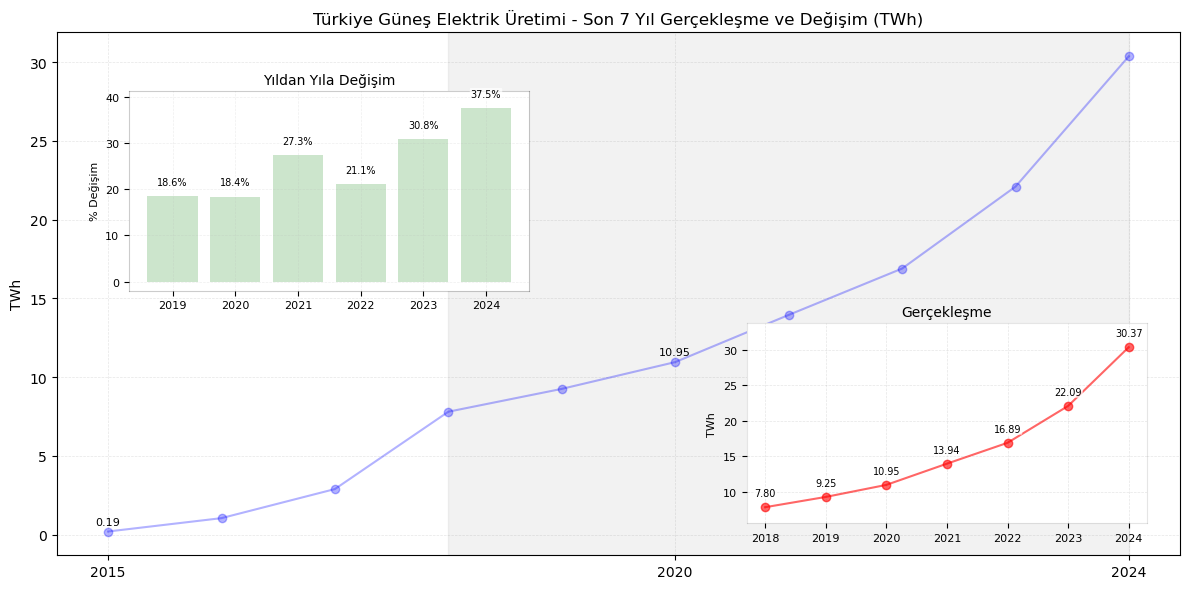

In [13]:
plot_trend_with_inset(tr.copy()[-10:], 'solar_twh', recent_years_count=7, annotate=5, ylabel='TWh',
                       bbox_to_anchor_trend=(1.02, 0.55), bbox_to_anchor_pct=(0.47, 0.40), 
                       title="Türkiye Güneş Elektrik Üretimi - Son 7 Yıl Gerçekleşme ve Değişim (TWh)")

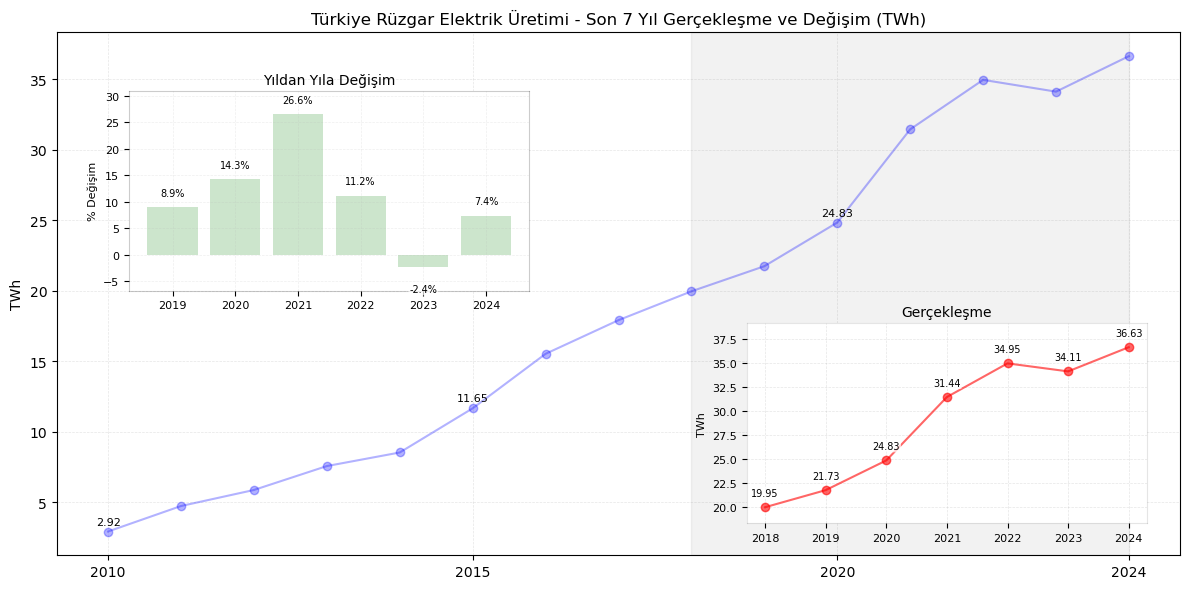

In [14]:
plot_trend_with_inset(tr.copy()[-15:], 'wind_twh', recent_years_count=7, annotate=5, ylabel='TWh',
                       bbox_to_anchor_trend=(1.02, 0.55), bbox_to_anchor_pct=(0.47, 0.40), 
                       title="Türkiye Rüzgar Elektrik Üretimi - Son 7 Yıl Gerçekleşme ve Değişim (TWh)")

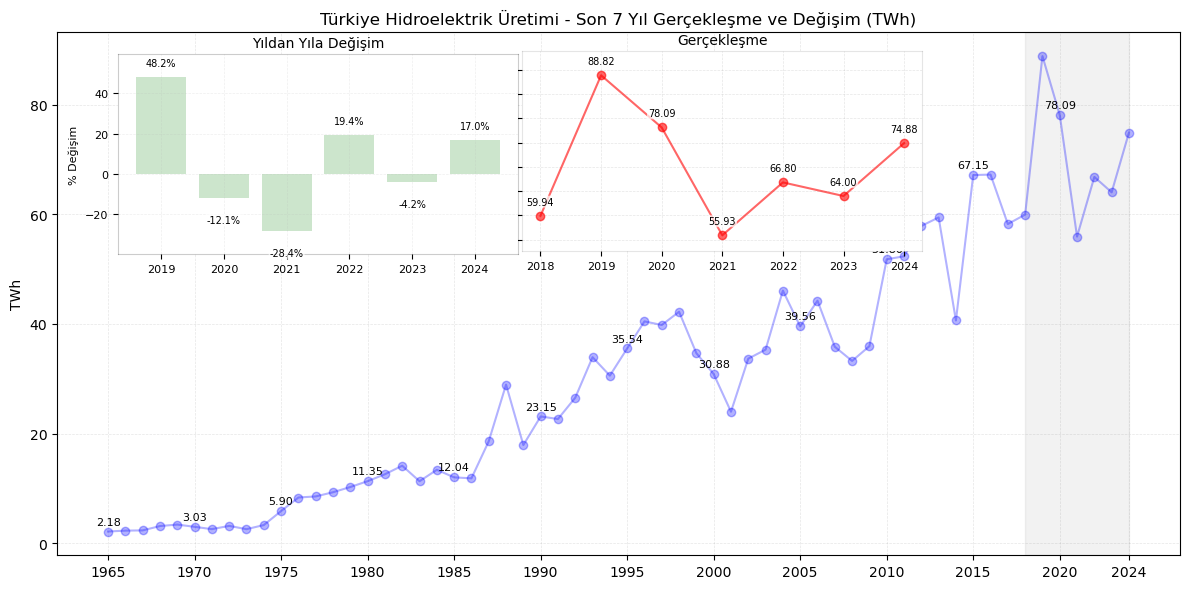

In [15]:
plot_trend_with_inset(tr.copy(), 'hydro_twh', recent_years_count=7, annotate=5, ylabel='TWh',
                       bbox_to_anchor_trend=(0.82, 1.07), bbox_to_anchor_pct=(0.46, 0.47), 
                       title="Türkiye Hidroelektrik Üretimi - Son 7 Yıl Gerçekleşme ve Değişim (TWh)")

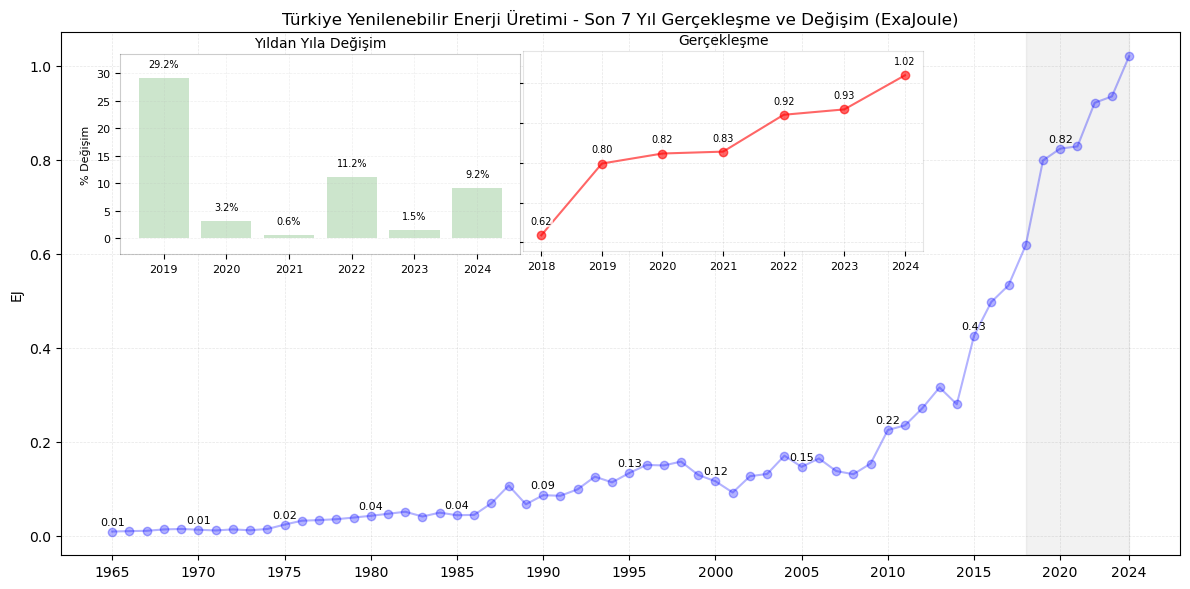

In [16]:
plot_trend_with_inset(tr.copy(), 'renewables_ej', recent_years_count=7, annotate=5, ylabel='EJ',
                       bbox_to_anchor_trend=(0.82, 1.07), bbox_to_anchor_pct=(0.46, 0.47), 
                       title="Türkiye Yenilenebilir Enerji Üretimi - Son 7 Yıl Gerçekleşme ve Değişim (ExaJoule)")

In [17]:
tr.columns

Index(['biofuels_cons_ej', 'biofuels_cons_kbd', 'biogeo_ej', 'biogeo_twh',
       'biogeo_twh_net', 'co2_combust_mtco2', 'co2_combust_pc',
       'co2_combust_per_ej', 'co2_mtco2', 'coalcons_ej', 'coalprod_ej',
       'coalprod_mt', 'elect_twh', 'electbyfuel_coal', 'electbyfuel_gas',
       'electbyfuel_hydro', 'electbyfuel_nuclear', 'electbyfuel_oil',
       'electbyfuel_other', 'electbyfuel_ren_power', 'electbyfuel_total',
       'gascons_bcfd', 'gascons_bcm', 'gascons_ej', 'graphite_kt',
       'graphiteres_kt', 'hydro_ej', 'hydro_twh', 'hydro_twh_net',
       'liqcons_kbd', 'methane_process_mtco2', 'nuclear_ej', 'nuclear_twh',
       'nuclear_twh_net', 'oilcons_ej', 'oilcons_kbd', 'oilcons_mt', 'pop',
       'refcap_kbd', 'refcaputil_pct', 'refthru_kbd', 'ren_power_ej',
       'ren_power_twh', 'ren_power_twh_net', 'renewables_ej', 'solar_ej',
       'solar_twh', 'solar_twh_net', 'tes_ej', 'tes_gj_pc', 'wind_ej',
       'wind_twh', 'wind_twh_net', 'oil_rate', 'gas_rate', 'coal_rate'

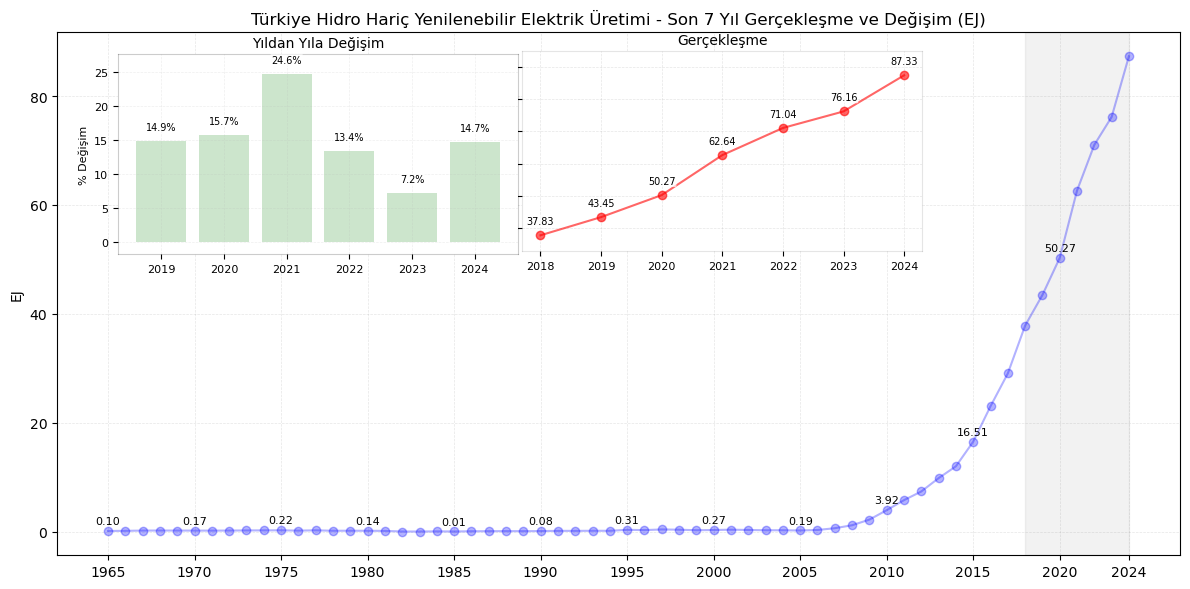

In [18]:
plot_trend_with_inset(tr.copy(), 'ren_power_twh', recent_years_count=7, annotate=5, ylabel='TWh',
                       bbox_to_anchor_trend=(0.82, 1.07), bbox_to_anchor_pct=(0.46, 0.47), 
                       title="Türkiye Hidro Hariç Yenilenebilir Elektrik Üretimi - Son 7 Yıl Gerçekleşme ve Değişim (TWh)")

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

def plot_energy_ratios(dataframe, rate_columns, labels=None, colors=None, markers=None, 
                      title="Enerji Tüketim", figsize=(12, 6), 
                      start_year=None, carpan=100,ylabel=""):
    """
    Create a line plot for energy consumption ratios with final value annotations.
    
    Parameters:
    -----------
    dataframe : pandas.DataFrame
        DataFrame with years as index and rate columns
    rate_columns : list
        List of column names containing the rates (e.g., ['oil_rate', 'gas_rate', 'coal_rate'])
    labels : list, optional
        Custom labels for the legend. If None, uses column names with '_rate' removed
    colors : list, optional
        Custom colors for each line. If None, uses default colors
    markers : list, optional
        Custom markers for each line. If None, uses default markers
    title : str, optional
        Title for the plot
    figsize : tuple, optional
        Figure size (width, height)
    start_year : int, optional
        Starting year for the plot. If None, uses all available data
    carpan : int, optional
        Multiplier for annotation values (100 for percentages, 1 for decimals)
    
    Returns:
    --------
    fig, ax : matplotlib figure and axis objects
    """
    
    # Default colors, markers, and labels
    default_colors = ['#2E8B57', '#4169E1', '#8B4513', '#DC143C', '#FF8C00', '#9932CC', '#20B2AA', '#FF1493']
    default_markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p']
    
    if colors is None:
        colors = default_colors[:len(rate_columns)]
    if markers is None:
        markers = default_markers[:len(rate_columns)]
    if labels is None:
        labels = [col.replace('_rate', '').replace('_', ' ').title() for col in rate_columns]
    
    # Filter dataframe by start year if specified
    if start_year is not None:
        dataframe = dataframe[dataframe.index >= start_year]
    
    # Create the figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Plot the lines
    for i, (col, label, color, marker) in enumerate(zip(rate_columns, labels, colors, markers)):
        ax.plot(dataframe.index, dataframe[col], marker=marker, linewidth=1.5, 
                label=label, color=color, markersize=3, alpha=0.7)
    
    # Set up the grid
    ax.grid(True, alpha=0.3, linestyle='--')
    
    # Configure axes
    ax.set_xlabel('Yıl', fontsize=12, fontweight='bold')
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_title(title, fontsize=14, pad=10)
    
    # Get the last year and its values
    last_year = dataframe.index[-1]
    
    # Prepare data for annotations with overlap avoidance
    annotation_data = []
    for i, (col, color, label) in enumerate(zip(rate_columns, colors, labels)):
        last_value = dataframe.loc[last_year, col]
        annotation_data.append({
            'label': label,
            'value': last_value,
            'color': color,
            'original_y': last_value,
            'adjusted_y': last_value
        })
    
    # Sort by y-value to handle overlaps systematically
    annotation_data.sort(key=lambda x: x['value'])
    
    # Avoid overlaps by adjusting y-positions
    min_distance = 0.035  # Increased minimum distance between annotations
    y_range = dataframe[rate_columns].max().max() - dataframe[rate_columns].min().min()
    min_distance_abs = min_distance * y_range
    
    # Adjust positions to avoid overlaps
    for i in range(1, len(annotation_data)):
        current = annotation_data[i]
        previous = annotation_data[i-1]
        
        # Check if current annotation is too close to the previous one
        if abs(current['adjusted_y'] - previous['adjusted_y']) < min_distance_abs:
            # Move current annotation up
            current['adjusted_y'] = previous['adjusted_y'] + min_distance_abs

    # Format y-axis to show as percentages or decimals
    if carpan == 100:
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.1%}'))
        txt=" %"
    elif carpan == 1:
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.1f}'))
        txt=" EJ"
        
    # Add annotations with adjusted positions
    for data in annotation_data:
        # Draw a line from original position to adjusted position if they differ
        if abs(data['adjusted_y'] - data['original_y']) > 0.001:
            ax.plot([last_year, last_year + 0.5], 
                   [data['original_y'], data['adjusted_y']], 
                   color=data['color'], 
                   alpha=0.5, 
                   linewidth=0.8,
                   linestyle=':')
        
        # Add the annotation - use data coordinates for positioning
        ax.annotate(f'{data["label"]}: {carpan*data["value"]:.1f}{txt}', 
                   xy=(last_year, data['adjusted_y']), 
                   xytext=(15, 0), 
                   textcoords='offset points',
                   fontsize=9, 
                   color=data['color'],
                   fontweight='bold',
                   ha='left',
                   va='center',
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='white', 
                           alpha=0.9, edgecolor=data['color'], linewidth=1))
    
    # Add legend
    ax.legend(loc='upper left', frameon=True, fancybox=True, shadow=True)
    
    # Adjust layout to prevent clipping
    plt.tight_layout()
    
    return fig, ax

# Example usage:
# fig, ax = plot_energy_ratios(
#     tr, 
#     ['oil_rate', 'gas_rate', 'coal_rate', 'elec_rate', 'ren_rate'],
#     labels=['Petrol', 'Gaz', 'Kömür', 'Elektrik', 'Yenilenebilir'],
#     title="Türkiye Birincil Enerji ve Elektrik Oranları (2010-2024)" )
# plt.show()

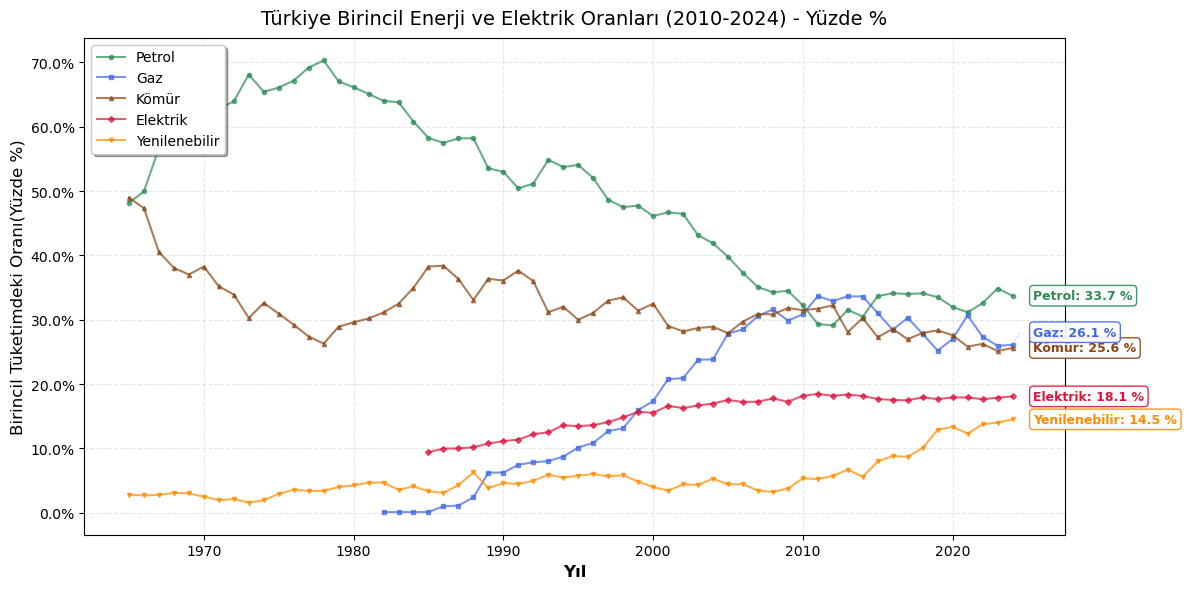

In [20]:
fig, ax = plot_energy_ratios(
    tr, 
    ['oil_rate', 'gas_rate', 'coal_rate', 'elec_rate', 'ren_rate'],
    labels=['Petrol', 'Gaz', 'Kömür', 'Elektrik', 'Yenilenebilir'],
    title="Türkiye Birincil Enerji ve Elektrik Oranları (2010-2024) - Yüzde %", ylabel ="Birincil Tüketimdeki Oranı(Yüzde %)" )
plt.show()

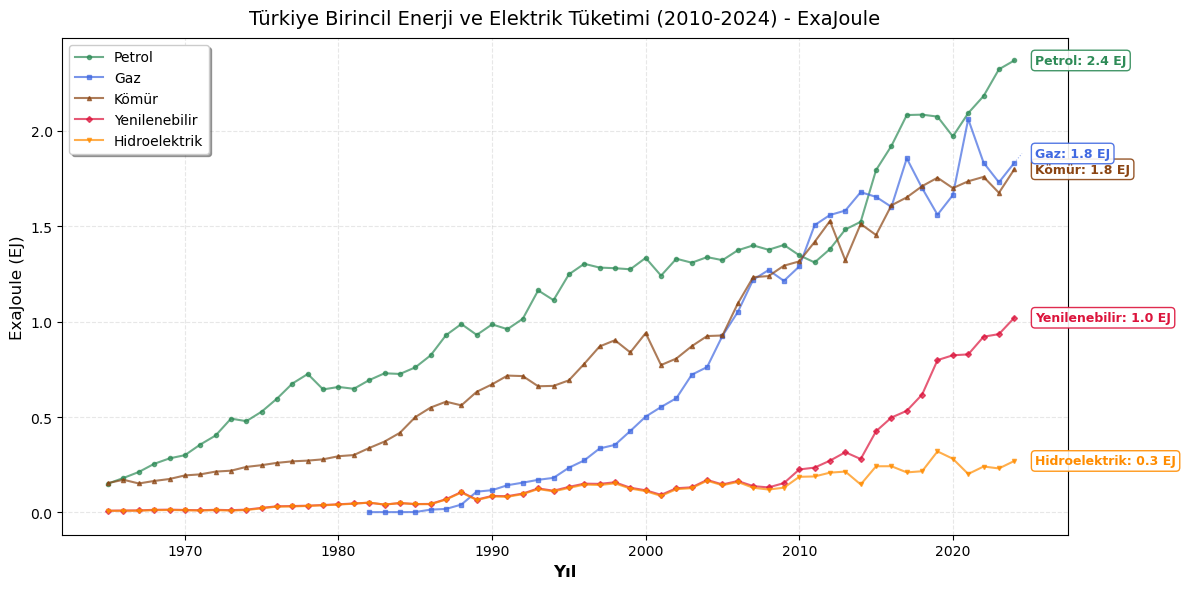

In [21]:
fig, ax = plot_energy_ratios(
    tr, 
    ['oilcons_ej', 'gascons_ej', 'coalcons_ej', 'renewables_ej','hydro_ej'],
    labels=['Petrol', 'Gaz', 'Kömür', 'Yenilenebilir','Hidroelektrik'],
    title="Türkiye Birincil Enerji ve Elektrik Tüketimi (2010-2024) - ExaJoule", carpan=1 ,
    ylabel ="ExaJoule (EJ)" )
plt.show()